<a href="https://colab.research.google.com/github/leandro23bh/PythonFundamentos/blob/master/TreinamentoArvoreDescisao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt


from warnings  import filterwarnings

In [2]:
Base_dados = pd.read_excel('/content/BaseDados_FlorestaDeDecisão.xlsx','Plan1')

In [3]:
Base_dados.head()

,Id Cliente,Idade,Preço Seguro,CEP,Serviço
0,1,69,3930,19005,3
1,2,27,3336,19027,1
2,3,49,3936,19001,3
3,4,60,157,19009,1
4,5,51,3998,19050,2


In [8]:
# 1 - Não usou, 
#2 - Usou algum tipo de serviço - 
#3-  Foi furtado
Base_dados.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Id Cliente    500 non-null    int64
 1   Idade         500 non-null    int64
 2   Preço Seguro  500 non-null    int64
 3   CEP           500 non-null    int64
 4   Serviço       500 non-null    int64
dtypes: int64(5)
memory usage: 19.7 KB


In [9]:
Base_dados.describe()

,Id Cliente,Idade,Preço Seguro,CEP,Serviço
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,49.550000,1939.268000,19024.812000,1.904000
std,144.481833,18.167984,1402.289601,15.079105,0.858054
min,1.000000,18.000000,100.000000,19000.000000,1.000000
25%,125.750000,33.750000,612.000000,19011.000000,1.000000
50%,250.500000,51.000000,1667.500000,19025.000000,2.000000
75%,375.250000,65.000000,3329.500000,19038.000000,3.000000
max,500.000000,80.000000,3998.000000,19050.000000,3.000000


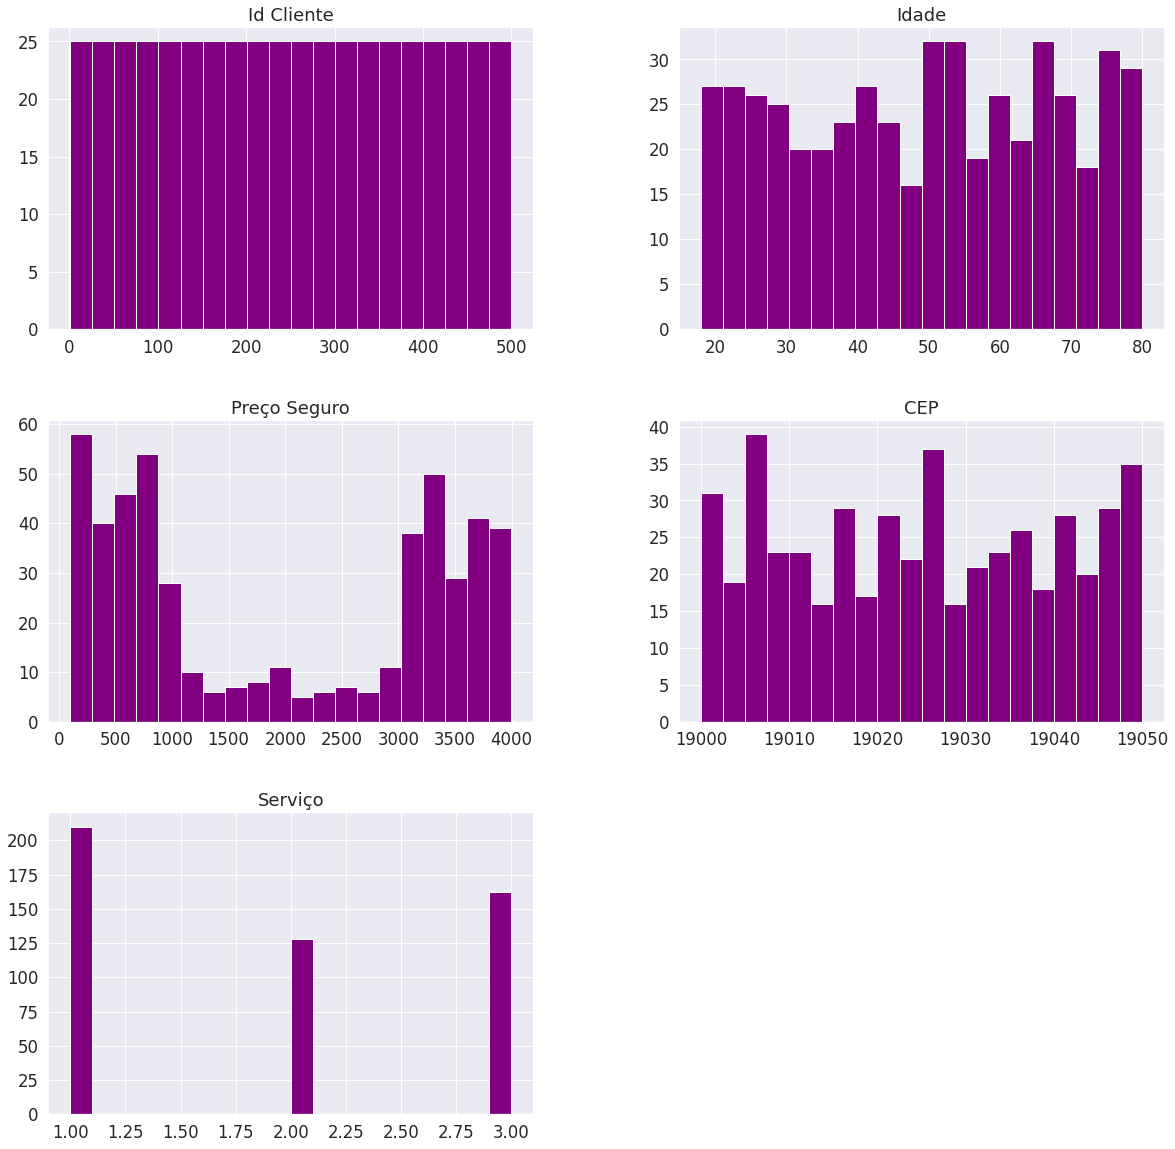

In [15]:
sb.set(font_scale=1.5,rc ={'figure.figsize':(20,20)})
eixo = Base_dados.hist(bins=20, color= 'purple')

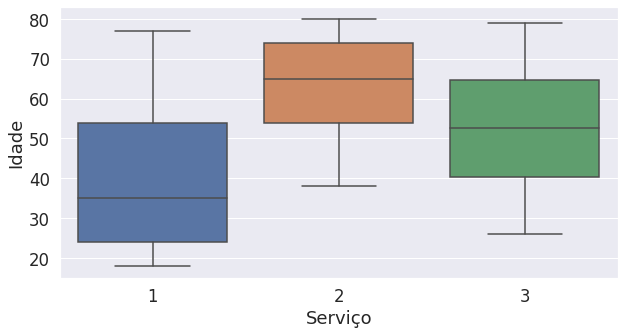

In [17]:
plt.figure(figsize=(10,5))
sb.boxplot(data=Base_dados, x='Serviço',y='Idade');

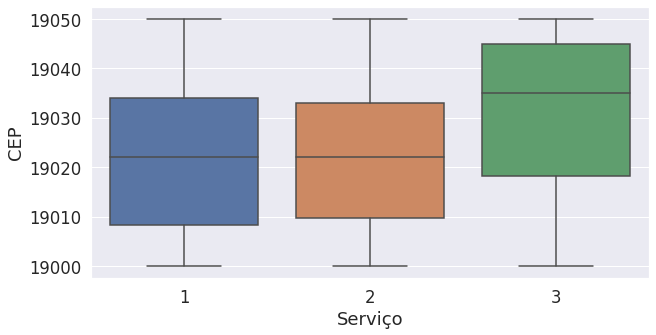

In [21]:
plt.figure(figsize=(10,5))
sb.boxplot(data=Base_dados,x='Serviço',y='CEP');

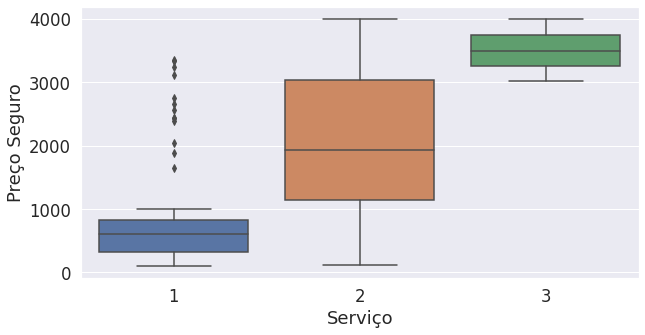

In [22]:
plt.figure(figsize=(10,5))
sb.boxplot(data=Base_dados,x='Serviço',y='Preço Seguro');

In [30]:
Caracteristicas = Base_dados.iloc[:,1:4].values
Previsor = Base_dados.iloc[:,4:5].values


In [32]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino,y_teste = train_test_split(
    Caracteristicas, 
    Previsor,
    test_size = 0.30,
    random_state = 10
)




350
150
350
150


In [38]:
from sklearn.ensemble import RandomForestClassifier
AlgoritmoFlorestaAleatorio = RandomForestClassifier(n_estimators=500)

In [39]:
AlgoritmoFlorestaAleatorio.fit(x_treino,y_treino)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [43]:
Previsoes = AlgoritmoFlorestaAleatorio.predict(x_teste)

In [45]:
from sklearn.metrics import  confusion_matrix
Matrix_Confusao = confusion_matrix

In [48]:
Matrix_Confusao = confusion_matrix(y_teste,Previsoes)
print (Matrix_Confusao)

[[62  1  1]
 [ 7 21  8]
 [ 0  1 49]]


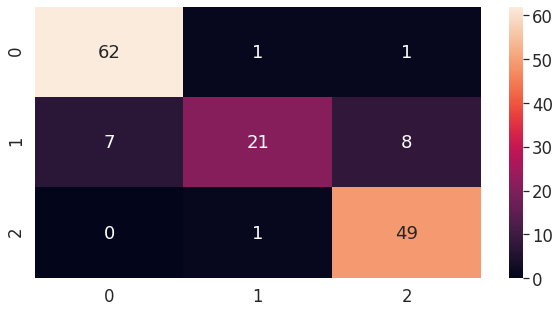

In [51]:
plt.figure(figsize=(10,5))
sb.heatmap(Matrix_Confusao,annot=True)

In [55]:
from sklearn.metrics import classification_report
report = classification_report(y_teste,Previsoes)
print(report)

              precision    recall  f1-score   support

           1       0.90      0.97      0.93        64
           2       0.91      0.58      0.71        36
           3       0.84      0.98      0.91        50

    accuracy                           0.88       150
   macro avg       0.89      0.84      0.85       150
weighted avg       0.88      0.88      0.87       150



In [57]:
NovasVendas = pd.read_excel('/content/BaseDados_FlorestaDeDecisão.xlsx','Plan2')

In [58]:
NovasVendas.head()

,Id Cliente,Idade,Preço Seguro,CEP
0,1001,25,801,19001
1,1002,27,1090,19027
2,1003,45,364,19030
3,1004,30,2428,19014
4,1005,32,891,19020


In [59]:
Prever = NovasVendas.iloc[:,1:4].values

In [61]:
NovasVendas['Previsao do Modelo'] = AlgoritmoFlorestaAleatorio.predict(Prever)

In [67]:
NovasVendas.value_counts()


Id Cliente  Idade  Preço Seguro  CEP    Previsao do Modelo
1021        32     1058          19017  1                     1
1010        40     928           19009  1                     1
1002        27     1090          19027  1                     1
1003        45     364           19030  1                     1
1004        30     2428          19014  1                     1
1005        32     891           19020  1                     1
1006        36     823           19025  1                     1
1007        44     3895          19032  3                     1
1008        36     457           19023  1                     1
1009        40     427           19008  1                     1
1011        45     178           19003  1                     1
1020        20     560           19008  1                     1
1012        46     1923          19013  2                     1
1013        48     2532          19039  2                     1
1014        54     145           19049  1    

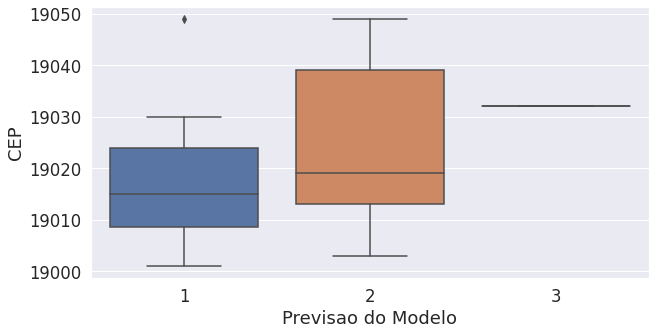

In [69]:
plt.figure(figsize=(10,5))
sb.boxplot(data=NovasVendas,x='Previsao do Modelo',y='CEP');

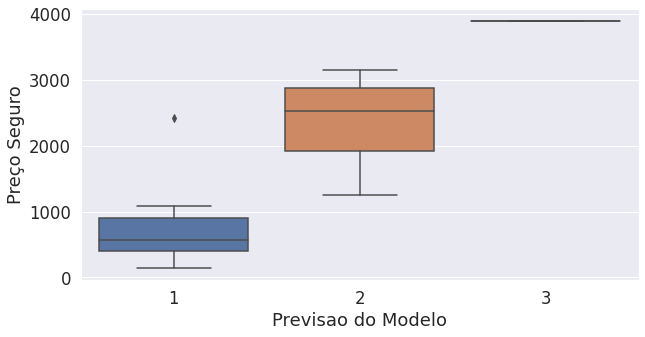

In [75]:
plt.figure(figsize=(10,5))
sb.boxplot(data = NovasVendas, x='Previsao do Modelo',y='Preço Seguro')